In [191]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split



[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


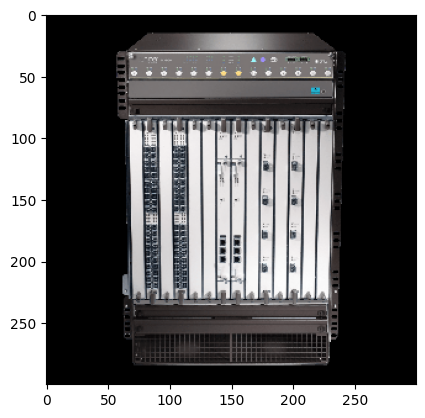

AP6.png
AP4.png
AP5.png
AP1.png
.DS_Store
Ap2.png
AP3.png
AP8.avif
AP7.avif
AP13.png
AP12.png
AP10.png
AP11.png
AP9.png
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


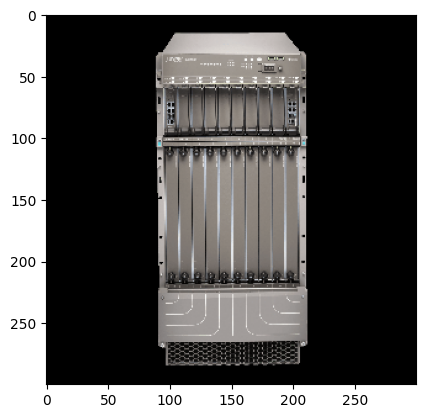

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


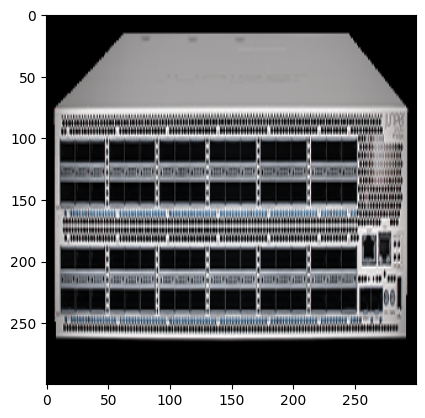

69
69


In [192]:
trainImages = []
trainLabels = []

for item in os.listdir("mistInternshipTrial/Routers"):
    trainImages.append(cv2.resize(cv2.imread("mistInternshipTrial/Routers/"+item), (300,300)))
    trainLabels.append(0)
print(trainImages[0])
plt.imshow(trainImages[0])
plt.show()

for item in os.listdir("mistInternshipTrial/APs/"):
    print(item)
    if "_" in item:
        continue
    if "avif" in item:
        continue
    trainImages.append(cv2.resize(cv2.imread("mistInternshipTrial/APs/"+item), (300,300)))
    trainLabels.append(1)
print(trainImages[1])
plt.imshow(trainImages[1])
plt.show()

for item in os.listdir("mistInternshipTrial/Switches/"):
    if "_" in item:
        continue
    if "avif" in item:
        continue
    trainImages.append(cv2.resize(cv2.imread("mistInternshipTrial/Switches/"+item), (300,300)))
    trainLabels.append(2)
print(trainImages[2])
plt.imshow(trainImages[2])
plt.show()

print(len(trainImages))
print(len(trainLabels))

In [193]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu' , input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
    
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [194]:
trainImages = np.array(trainImages).astype(np.float32)
trainLabels = np.array(trainLabels)

trainImages, testImages, trainLabels, testLabels = train_test_split(trainImages, trainLabels, test_size = 0.3)

trainImages = trainImages / 255.0

testImages = testImages / 255.0

model.fit(trainImages, trainLabels, epochs=3)

test_loss, test_acc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

Epoch 1/3
2/2 [==============================] - 9s 2s/step - loss: 5.6522 - accuracy: 0.3542
Epoch 2/3
2/2 [==============================] - 6s 2s/step - loss: 12.1510 - accuracy: 0.5625
Epoch 3/3
2/2 [==============================] - 4s 1s/step - loss: 18.3672 - accuracy: 0.6667
1/1 - 1s - loss: 20.0646 - accuracy: 0.5238 - 1s/epoch - 1s/step

Test accuracy: 0.523809552192688


In [195]:
predictions = probability_model.predict(testImages)
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

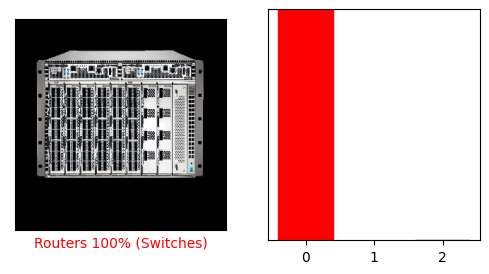

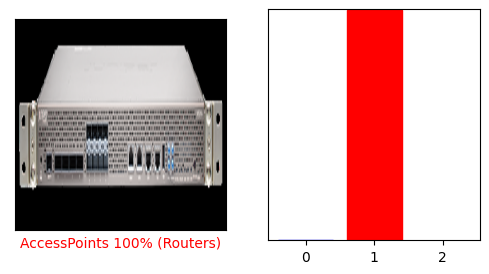

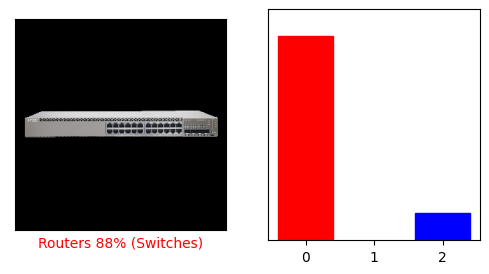

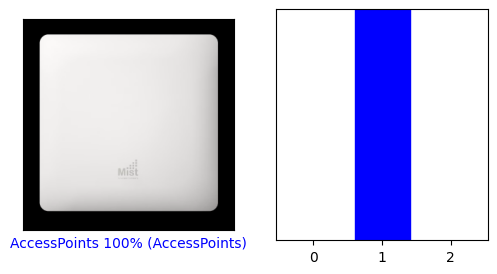

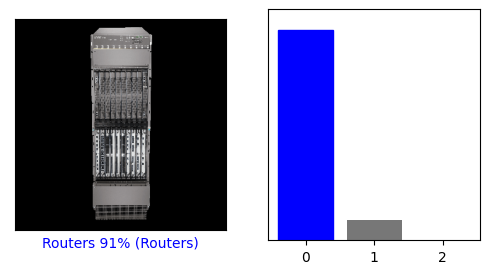

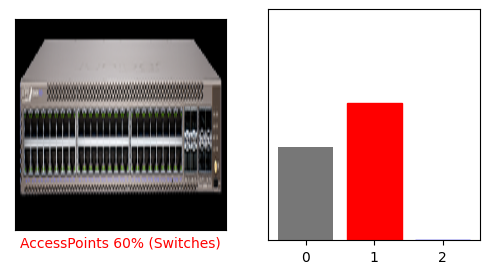

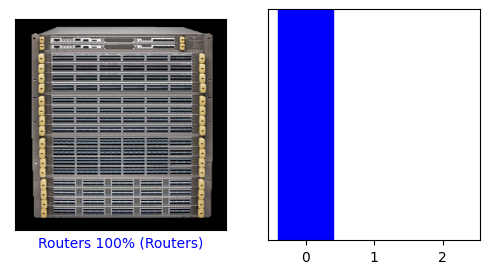

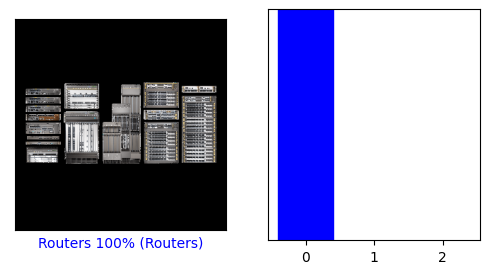

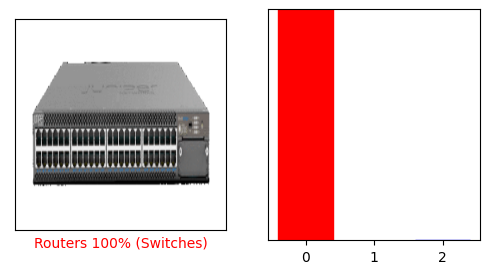

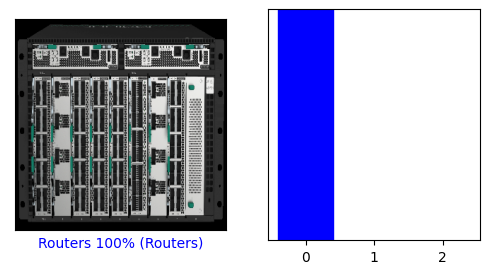

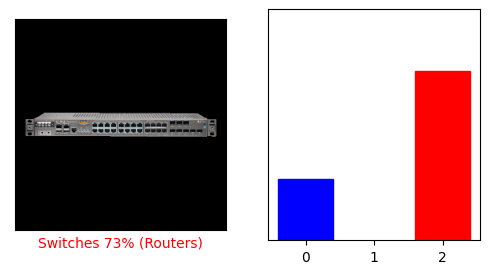

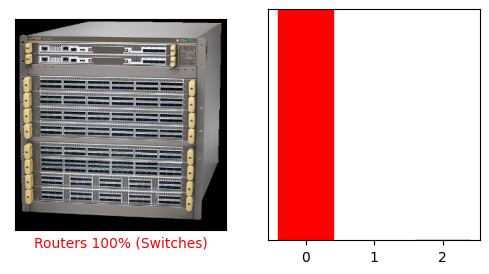

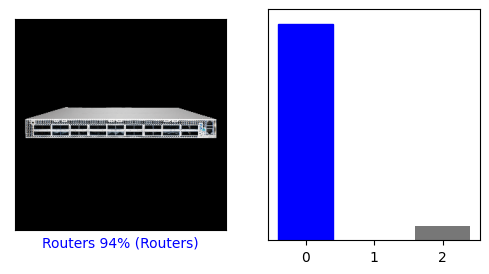

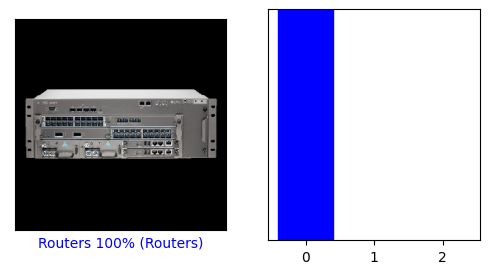

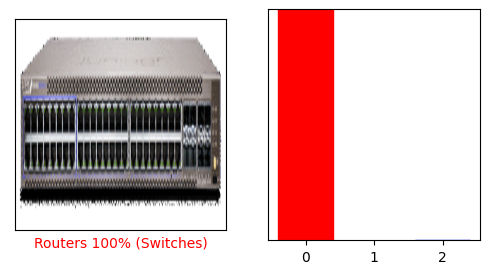

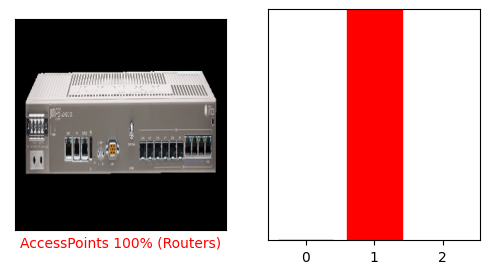

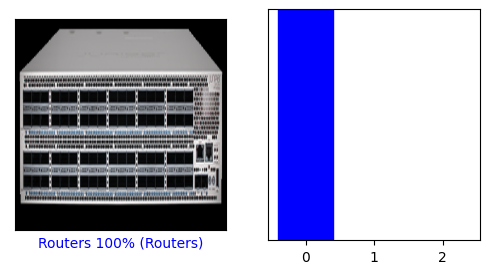

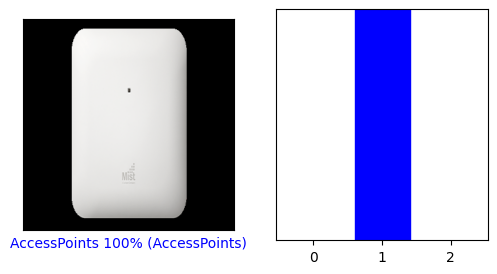

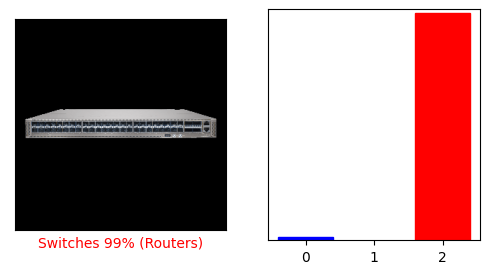

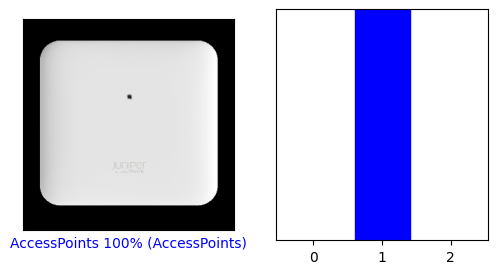

In [196]:
for i in range(0,len(predictions)-1, 1):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], testLabels, testImages)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  testLabels)
    plt.show()